# Percolation

In [24]:

import numpy, networkx, pandas, matplotlib, seaborn

from matplotlib import pyplot

%matplotlib inline


In [25]:

# simple parallelization

# import multiprocessing
# cpus = multiprocessing.cpu_count()
# pool = multiprocessing.Pool(processes=cpus)
# pool.map(...)


## Random failure

In [26]:

def randomFailure(graph, steps=100):
    initialGraph = graph
    initialGraphSize = networkx.number_of_nodes(initialGraph)
    numbersOfNodesToRemove = numpy.linspace(0, initialGraphSize, num=steps, dtype='int')
    initialNodes = initialGraph.nodes()
    randomizedNodes = numpy.random.permutation(initialNodes)
    
    #initialDegrees = initialGraph.degree() #.items()
    
    #randomDegrees = numpy.random.permutation(initialDegrees)
    
    
    
    
    # TODO vedere se si possono agevolmente parallelizzare le list comprehension, che sono molto più scorrevoli da usare
    
    
    # TODO fare tutta l'analisi di un singolo sottografo in un'unica funzione
    # e poi fare una mappa parallela sulle varie sngole analisi
    
    
    def analyzeSingleGraph(index):
        newGraph = initialGraph.copy()
        newGraph.remove_nodes_from(randomizedNodes[0:index])
        newGraphSize = networkx.number_of_nodes(newGraph)
        grado = newGraph.degree().items()
        subgraphs = networkx.connected_component_subgraphs(newGraph)
        try:
            giantCluster = subgraphs[0]
        except:
            giantCluster = networkx.Graph()
        giantClusterSize = networkx.number_of_nodes(giantCluster)
        relativeGiantClusterSize = numpy.true_divide(giantClusterSize, newGraphSize)
        try:
            diameter = networkx.diameter(giantCluster, e=None)
        except:
            diameter = 0
        # diameter = 1
        return relativeGiantClusterSize, diameter

    failureResults = map(analyzeSingleGraph, numbersOfNodesToRemove)
    failureDataframe = pandas.DataFrame(failureResults, columns=['relativeGiantClusterSize', 'diameter'])
    ascisse = numpy.linspace(0,100, num=steps, dtype='int')
    failureDataframe['percentuale'] = ascisse
    
    return failureDataframe


CPU times: user 7min 49s, sys: 4.09 s, total: 7min 53s
Wall time: 7min 59s
random failure


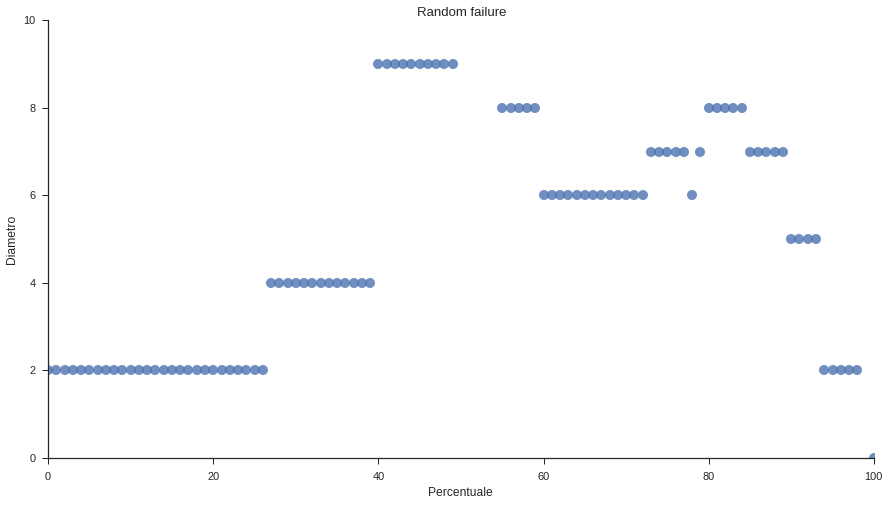

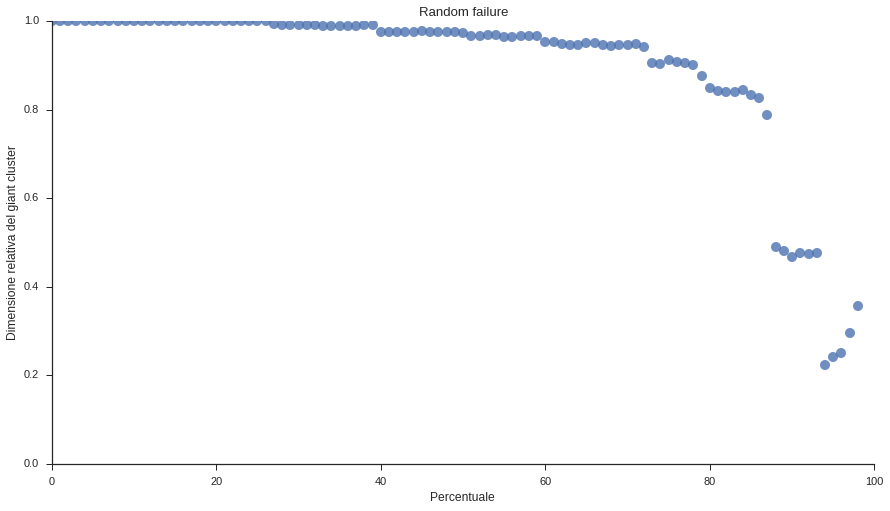

In [27]:

gestore = ["Tim", "Vodafone", "Wind", "Tre"]
#
gestore = ["Tre"]

    

# TODO parallelizzare
for provider in gestore:
    adiacenza = numpy.genfromtxt(("/home/federico/dati Iuri/AdiacenzaEuclidea_{0}.csv".format(provider)),\
                                 delimiter=',',\
                                 dtype='int')
    providerGraph = networkx.Graph(adiacenza)
    %time failureResults = randomFailure(providerGraph, steps=100)
    print "random failure"


# TODO fare diametro relativo e scatterplot di correlazione tra diametro relativo e relativeGiantClusterSize


seaborn.set_context("notebook", font_scale=1.1)
seaborn.set_style("ticks")


seaborn.lmplot('percentuale', 'diameter',
           data=failureResults,
           fit_reg=False,
           size = 7,
           aspect = 1.7778,
           # hue='Compagnia', # TODO
           scatter_kws={"marker": "D", "s": 100})
pyplot.title('Random failure')
pyplot.xlabel("Percentuale")
pyplot.ylabel("Diametro")
pyplot.xlim(0, 101)
pyplot.ylim(0, 10)
pyplot.savefig('../img/randomFailure_diameter_Fede.eps', format='eps', dpi=1000)

seaborn.lmplot('percentuale', 'relativeGiantClusterSize',
           data=failureResults,
           fit_reg=False,
           size = 7,
           aspect = 1.7778,
           # hue='Compagnia', # TODO
           scatter_kws={"marker": "D", "s": 100})
pyplot.title('Random failure')
pyplot.xlabel("Percentuale")
pyplot.ylabel("Dimensione relativa del giant cluster")
pyplot.xlim(0, 101)
pyplot.ylim(0, 1,1)
pyplot.savefig('../img/randomFailure_relativeGiantClusterSize_Fede.eps', format='eps', dpi=1000)

In [18]:
failureResults.diameter

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
...
85    4
86    4
87    3
88    3
89    4
90    4
91    3
92    3
93    3
94    3
95    3
96    3
97    2
98    1
99    0
Name: diameter, Length: 100, dtype: int64

In [19]:
failureResults.relativeGiantClusterSize

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
...
85    0.849462
86    0.843931
87    0.850000
88    0.850340
89    0.827068
90    0.800000
91    0.803738
92    0.827957
93    0.825000
94    0.537313
95    0.574074
96    0.225000
97    0.148148
98    0.214286
99         NaN
Name: relativeGiantClusterSize, Length: 100, dtype: float64

In [122]:
adiacenza = numpy.genfromtxt("/home/federico/dati Iuri/AdiacenzaEuclidea_Tre.csv",\
                                 delimiter=',',\
                                 dtype='int')
initialGraph = networkx.Graph(adiacenza)

## Intentional attack

In [1]:
def intentionalAttack():
    pass